In [8]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

titanic_set = pd.read_csv("G:/Meu Drive/Mestrado/Disciplinas/RP/disciplina_rp/classification_datasets/titanic_train_and_test2.csv")
titanic_set.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,Survived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [9]:
#repetindo alguns tratamentos anteriores aplicados no exercicio de classificacao

#alterando nome da ultima coluna
titanic_set.rename(columns={"2urvived": "Survived"})

#removendo as colunas que não serão consideradas
titanic_set.drop(titanic_set.columns[titanic_set.columns.str.contains('zero')], axis=1, inplace=True)

 #o id não contribui com informações na classificação
titanic_set = titanic_set.drop('Passengerid', 1)

#verifiquei que haviam dois registros com valores nulos na coluna Embarked, portant removi
titanic_set.dropna(inplace=True)
titanic_set.isnull().sum()
titanic_set.head()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,22.0,7.2500,0,1,0,3,2.0,0
1,38.0,71.2833,1,1,0,1,0.0,1
2,26.0,7.9250,1,0,0,3,2.0,1
3,35.0,53.1000,1,1,0,1,2.0,1
4,35.0,8.0500,0,0,0,3,2.0,0


In [10]:
y = titanic_set.Survived
X = titanic_set.drop('Survived', 1)

len(X), X.shape, len(y), y.shape

(1307, (1307, 7), 1307, (1307,))

Verificando a distribuição da base com relação às caracteristicas:

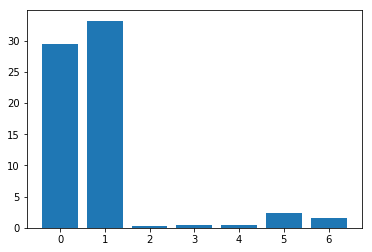

In [19]:
plt.bar(list(range(X.shape[1])), np.mean(X, axis=0))
plt.show()

Observamos que as duas primeiras caracteristicas destoam muito das demais, 
Assim, utilizaremos uma padronização para mitigar pioras no classificador que for sensível a isso, como o KNN

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


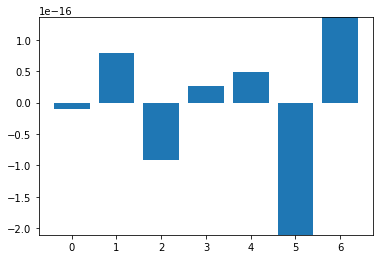

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

#verificando novamente
plt.bar(list(range(X.shape[1])), np.mean(X, axis=0))
plt.show()

Melhorou bastante a distribuição das características. 
Vamos prosseguir com a construção dos dois modelos de classificação que queremos analisar LinearRegression e KNN utilizando cross_validate para avaliação.

In [16]:
#separando a base em treino e teste antes de treinar os modelos

#VERIFICAR O LOCAL DESSA DIVISAO>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

#VER ONDE USAR X_TREINO Y_TREINO dividido

#precisei aumentar as iterações, pois não estava convergindo com o padrão
modeloLR = LogisticRegression(solver='lbfgs', max_iter=400)
scoresLR = cross_validate(modeloLR, X, y)
test_scoresLR = np.mean(scoresLR['test_score'])

print(f"Score LinearRegression: {test_scoresLR}")

Score LinearRegression: 0.7719596342179788


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


# KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier

modeloKNN = KNeighborsClassifier()
modeloKNN.fit(X_train, y_train)
ypred = modeloKNN.predict(X_test)
accKNN = accuracy_score(y_test, ypred)
accKNN

0.7037037037037037